In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1

In [3]:
def gaussian_samples(mean = 0, std_dev = 1, nb_samples = 1):
        
    mean = np.array(mean)
    std_dev = np.array(std_dev)
    dim = mean.shape[0]
    
    normal_samples = np.random.normal(size = dim * nb_samples).reshape(dim, nb_samples)
    samples = np.array(std_dev).dot(normal_samples) 
    samples += np.array(mean).reshape(dim,1).dot(np.ones((1,nb_samples)))
    return samples.T

In [31]:
mu1 = [0, 0]
sigma1 = [[1,1],[1,4]]
MVN1 = gaussian_samples(mu1, sigma1, 25)

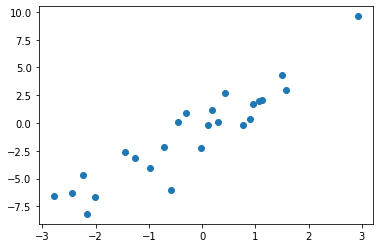

In [5]:
plt.scatter(MVN1[:,0],MVN1[:,1])

In [6]:
mu2 = [2, 2]
sigma2 = [[1,1],[1,4]]
MVN2 = gaussian_samples(mu2, sigma2, 25)

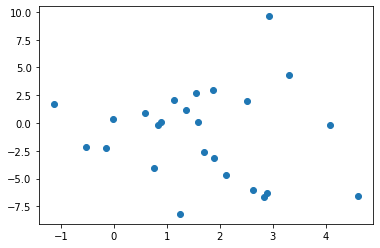

In [7]:
plt.scatter(MVN2[:,0],MVN1[:,1])

In [8]:
mu3 = [2, 2]
sigma3 = [[4,4],[4,16]]
MVN3 = gaussian_samples(mu3, sigma3, 25)

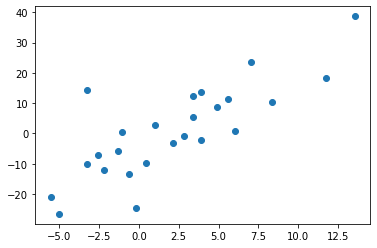

In [183]:
plt.scatter(MVN3[:,0],MVN3[:,1])

# 2

In [155]:
def depthMath(points, dataset):
    mah_distance = []
    nb_features = dataset.shape[1]
    nb_obs = dataset.shape[0]
    try:
        len(points[0])
    except:
        points = [points]
    for point in points:
        d_to_mean = point - dataset.mean(0)
        cov = np.cov(dataset.T)
        d = np.dot(np.dot(d_to_mean, np.linalg.inv(cov)),d_to_mean.T)
        mah_distance.append(round(d,2))
    return mah_distance

In [177]:
MVN1_mah = [depthMath(x,MVN1)[0] for x in MVN1]
MVN2_mah = [depthMath(x,MVN2)[0] for x in MVN2]
MVN3_mah = [depthMath(x,MVN3)[0] for x in MVN3]

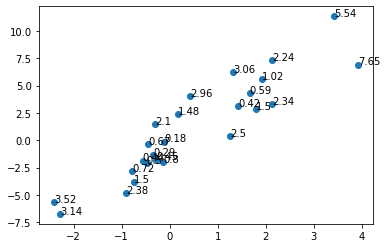

In [178]:
fig, ax = plt.subplots()
ax.scatter(MVN1[:,0],MVN1[:,1])

for i, txt in enumerate(MVN1_mah):
    ax.annotate(txt, (MVN1[:,0][i], MVN1[:,1][i]))

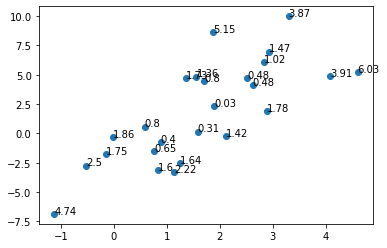

In [180]:
fig, ax = plt.subplots()
ax.scatter(MVN2[:,0],MVN2[:,1])

for i, txt in enumerate(MVN2_mah):
    ax.annotate(txt, (MVN2[:,0][i], MVN2[:,1][i]))

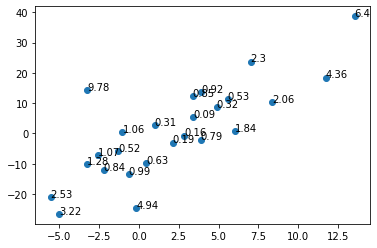

In [181]:
fig, ax = plt.subplots()
ax.scatter(MVN3[:,0],MVN3[:,1])

for i, txt in enumerate(MVN3_bmah):
    ax.annotate(txt, (MVN3[:,0][i], MVN3[:,1][i]))

On remarque que plus on s'écarte des centres plus le score augmente, ce qui est attendu.